<a href="https://colab.research.google.com/github/Luganda1/Google-colab-/blob/main/Movie_Budget_vs_Revenue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The question we want to answer today is: Do higher film budgets lead to more revenue in the box office? In other words, should a movie studio spend more on a film to make more

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc # contains imgs
from PIL import Image # for reading img files
from numpy.random import default_rng
import datetime as dt
import pandas as pd
import re
import seaborn as sns
from sklearn.linear_model import LinearRegression

df_revenue_dt = pd.read_csv('cost_revenue_dirty.csv')

Challenge 1


    How many rows and columns does the dataset contain?

    Are there any NaN values present?

    Are there any duplicate rows?

    What are the data types of the columns?

In [ ]:
df_revenue_dt.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"


In [ ]:
df_revenue_dt.shape

(5391, 6)

In [ ]:
df_revenue_dt.describe()

,Rank
count,5391.000000
mean,2696.000000
std,1556.391981
min,1.000000
25%,1348.500000
50%,2696.000000
75%,4043.500000
max,5391.000000


In [ ]:
df_revenue_dt.columns

Index(['Rank', 'Release_Date', 'Movie_Title', 'USD_Production_Budget',
       'USD_Worldwide_Gross', 'USD_Domestic_Gross'],
      dtype='object')

In [ ]:
df_revenue_dt.dropna(inplace=True)

In [ ]:
df_revenue_dt[df_revenue_dt.duplicated(subset=['Release_Date', 'Movie_Title', ])]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3055,5290,12/31/2007,A Dog's Breakfast,"$120,000",$0,$0


In [ ]:
df_revenue_dt.drop_duplicates(subset=['Release_Date', 'Movie_Title'], inplace=True)

In [ ]:
df_revenue_dt[df_revenue_dt['Movie_Title'] == "A Dog's Breakfast"]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3054,5289,12/31/2007,A Dog's Breakfast,"$120,000",$0,$0


In [ ]:
df_revenue_dt.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"


In [ ]:
type(df_revenue_dt)

pandas.core.frame.DataFrame

##Challenge 2
Convert the USD_Production_Budget, USD_Worldwide_Gross, and USD_Domestic_Gross columns to a numeric format by removing "&" signs and ,.
df_revenue_dt.USD_Production_Budget = df_revenue_dt.USD_Production_Budget.astype(str).str.replace(',', '')$

In [ ]:
#df_revenue_dt.USD_Production_Budget = re.sub('\W', '', df_revenue_dt.USD_Production_Budget)


In [ ]:
df_revenue_dt.USD_Production_Budget = df_revenue_dt.USD_Production_Budget.astype(str).str.replace(',', '')
df_revenue_dt.USD_Production_Budget = df_revenue_dt.USD_Production_Budget.astype(str).str.replace('$', '')
df_revenue_dt.USD_Production_Budget = pd.to_numeric(df_revenue_dt.USD_Production_Budget)
print(type(df_revenue_dt.USD_Production_Budget[2]))


<class 'numpy.int64'>


In [ ]:
df_revenue_dt.USD_Domestic_Gross = df_revenue_dt.USD_Domestic_Gross.astype(str).str.replace(',','')
df_revenue_dt.USD_Domestic_Gross = df_revenue_dt.USD_Domestic_Gross.astype(str).str.replace('$','')

Conveting USD Domestic GROSS TO INT

In [ ]:
df_revenue_dt.USD_Domestic_Gross = pd.to_numeric(df_revenue_dt.USD_Domestic_Gross)
print(type(df_revenue_dt.USD_Domestic_Gross))

<class 'pandas.core.series.Series'>


Conveting USD WORLD WIDE GROSS TO INT

In [ ]:
df_revenue_dt.USD_Worldwide_Gross = df_revenue_dt.USD_Worldwide_Gross.astype(str).str.replace(',', '')
df_revenue_dt.USD_Worldwide_Gross = df_revenue_dt.USD_Worldwide_Gross.astype(str).str.replace('$', '')
df_revenue_dt.USD_Worldwide_Gross = pd.to_numeric(df_revenue_dt.USD_Worldwide_Gross)
print(type(df_revenue_dt.USD_Worldwide_Gross[1]))

<class 'numpy.int64'>


#converitng to pandas Data series 

In [ ]:
df_revenue_dt.Release_Date = pd.to_datetime(df_revenue_dt.Release_Date)

In [ ]:
type(df_revenue_dt.Release_Date[2])

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
df_revenue_dt.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000


**SOLUTION**

With any new dataset, it's a good idea to do some standard checks and conversions. I typically always first look at .shape, .head(), .tail(), .info() and .sample().  Here's what I'm spotting already:

    chars_to_remove = [',', '$']
    columns_to_clean = ['USD_Production_Budget', 
                        'USD_Worldwide_Gross',
                        'USD_Domestic_Gross']
     
    for col in columns_to_clean:
        for char in chars_to_remove:
            # Replace each character with an empty string
            data[col] = data[col].astype(str).str.replace(char, "")
        # Convert column to a numeric data type
        data[col] = pd.to_numeric(data[col])

In [ ]:
df_revenue_dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5390 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   5390 non-null   int64         
 1   Release_Date           5390 non-null   datetime64[ns]
 2   Movie_Title            5390 non-null   object        
 3   USD_Production_Budget  5390 non-null   int64         
 4   USD_Worldwide_Gross    5390 non-null   int64         
 5   USD_Domestic_Gross     5390 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 454.8+ KB


#Investigate the Films that had Zero Revenue
Challenge 1

    What is the average production budget of the films in the data set?

    What is the average worldwide gross revenue of films?

    What were the minimums for worldwide and domestic revenue?

    Are the bottom 25% of films actually profitable or do they lose money?

    What are the highest production budget and highest worldwide gross revenue of any film?

    How much revenue did the lowest and highest budget films make?

Challenge 2

How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?


Challenge 3

How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally (i.e., the biggest flops)?

In [ ]:
df_revenue_dt.describe()

,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,5390.000000,5.390000e+03,5.390000e+03,5.390000e+03
mean,2695.518738,3.111949e+07,8.887191e+07,4.124317e+07
std,1556.135163,4.052536e+07,1.684690e+08,6.603308e+07
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00
25%,1348.250000,5.000000e+06,3.877146e+06,1.335066e+06
50%,2695.500000,1.700000e+07,2.746004e+07,1.719656e+07
75%,4042.750000,4.000000e+07,9.646182e+07,5.234866e+07
max,5391.000000,4.250000e+08,2.783919e+09,9.366622e+08


In [ ]:
df_revenue_dt.USD_Production_Budget.min()

1100

In [ ]:
df_revenue_dt.USD_Worldwide_Gross.describe()

count    5.390000e+03
mean     8.887191e+07
std      1.684690e+08
min      0.000000e+00
25%      3.877146e+06
50%      2.746004e+07
75%      9.646182e+07
max      2.783919e+09
Name: USD_Worldwide_Gross, dtype: float64

In [ ]:
df_revenue_dt.USD_Production_Budget.sort_values(ascending=False).head()

3529    425000000
5079    306000000
2911    300000000
4925    300000000
4333    275000000
Name: USD_Production_Budget, dtype: int64

In [ ]:
df_revenue_dt.USD_Worldwide_Gross.sort_values(ascending=False).head()

3529    2783918982
1034    2207615668
5079    2058662225
5077    1671640593
4131    1519479547
Name: USD_Worldwide_Gross, dtype: int64

The average film costs about $31m to make and makes around 3x that (or ~$89m) in worldwide revenue. So that's encouraging.

But quite a lot of films lose money too. In fact, all the films in the bottom quartile lose money, since the average cost is $5 million and they only bring in $3.8m in worldwide revenue!

The minimum domestic and worldwide revenue is $0. That makes sense. If a film never gets screened or is cancelled, then this is the number we would expect to see here.

On the other hand, the highest production budget was $425,000,000 and the highest worldwide revenue was $2,783,918,982. $2.7 Billion revenue! Holy smokes.

So which film was the lowest budget film in the dataset?

In [ ]:
df_revenue_dt[df_revenue_dt.USD_Production_Budget == 1100]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
2427,5391,2005-05-08,My Date With Drew,1100,181041,181041


And the highest budget film in the dataset is:

In [ ]:
df_revenue_dt[df_revenue_dt.USD_Production_Budget == 425000000]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3529,1,2009-12-18,Avatar,425000000,2783918982,760507625


How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [ ]:
zero_domestic= df_revenue_dt[df_revenue_dt.USD_Domestic_Gross == 0]


In [ ]:
print(f'Number of films that grossed $0 domestically {len(zero_domestic)}')

Number of films that grossed $0 domestically 511


In [ ]:
zero_domestic.sort_values('USD_Production_Budget', ascending=False)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla",80000000,4547660,0
...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0
3056,5374,2007-12-31,Tin Can Man,12000,0,0
4907,5381,2015-05-19,Family Motocross,10000,0,0
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0


How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally (i.e., the biggest flops)?

In [ ]:
zero_Intx = df_revenue_dt[df_revenue_dt.USD_Worldwide_Gross == 0]


In [ ]:
print(f'Number of films that grossed $0 domestically {len(zero_Intx)}')

Number of films that grossed $0 domestically 356


In [ ]:
zero_Intx.sort_values('USD_Production_Budget', ascending=False)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5338,879,2017-04-08,The Dark Tower,60000000,0,0
...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0
3056,5374,2007-12-31,Tin Can Man,12000,0,0
4907,5381,2015-05-19,Family Motocross,10000,0,0
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0


When we check worldwide revenue instead, we see that there are 357 films that made no money internationally. Once again, some of the films have not been released yet at the time the data was compiled. However, 512 versus 357. Why is there a difference? 

The reason some international films were never screened in the United States.  In fact, we can see an example of this in our previous screenshot. "Don Gato, el inicio de la pandilla" made about $4.5 million dollars in the box office, but nothing in the United States. Perhaps they should have screened it there too, considering it cost $80 million to make! 


#Filter on Multiple Conditions: International Films

So far, we've created subsets for our DataFrames based on a single condition. But what if we want to select our data based on more than one condition? For example, which films made money internationally (i.e., data.USD_Worldwide_Gross != 0), but had zero box office revenue in the United States (i.e., data.USD_Domestic_Gross == 0)? 


How would we create a filter for these two conditions? One approach is to use the .loc[] property combined with the bitwise and & operator.
<img src='https://img-c.udemycdn.com/redactor/raw/2020-10-14_18-25-38-1acab27e5b6c677db5828de681d34cbe.png'>

we're also checking if the domestic revenue was zero and the worldwide revenue was not zero. Because the bitwise operator takes precedence, we need to include parentheses () around the comparisons we'd like to prioritise. 

In [ ]:
intx_release = df_revenue_dt.loc[(df_revenue_dt.USD_Domestic_Gross == 0)& (df_revenue_dt.USD_Worldwide_Gross != 0)]
print(len(intx_release))
intx_release.sort_values('USD_Worldwide_Gross', ascending=False)

155


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
2836,1270,2006-12-31,Les Bronzés 3: amis pour la vie,42000000,83833602,0
4960,3283,2015-08-05,La famille Bélier,11000000,74056184,0
3809,2154,2010-12-31,Sammy's avonturen: De geheime doorgang,25000000,71594792,0
3769,2776,2010-11-05,Haeundae,16000000,64733391,0
3051,2665,2007-12-31,Taxi 4,17500000,60865364,0
...,...,...,...,...,...,...
5141,4076,2016-02-09,Yoga Hosers,5000000,2199,0
3573,5015,2010-01-26,B-Girl,700000,1160,0
5103,4625,2015-12-31,"To Be Frank, Sinatra at 100",2000000,926,0
4772,5005,2014-12-31,Destiny,750000,450,0


In [ ]:
query_intx_release = df_revenue_dt.query('USD_Domestic_Gross == 0 and USD_Worldwide_Gross != 0')
query_intx_release.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0


#Unreleased Films

Now we can turn our attention to films in the dataset that were not released at the time the data was collected. This is why films like Singularity and Aquaman had zero revenue. 

In [ ]:
scrape_date = pd.to_datetime('2018-05-01')
unreleased_movies = df_revenue_dt[df_revenue_dt.Release_Date >= scrape_date]
print(len(unreleased_movies))
unreleased_movies.head(10)

7


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5386,2950,2018-10-08,Meg,15000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0
5390,2517,2020-12-31,"Story of Bonnie and Clyde, The",20000000,0,0


In [ ]:
data_clean = df_revenue_dt.drop(unreleased_movies.index)
print(len(data_clean))
data_clean.head()

5383


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000


Bonus Challenge: Films that Lost Money

Having removed the unreleased films entirely can you calculate the percentage of films that did not break even at the box office? We already saw that more than the bottom quartile of movies appears to lose money when we ran .describe(). However, what is the true percentage of films where the costs exceed the worldwide gross revenue? 




In [ ]:
data_clean.describe()

,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,5383.000000,5.383000e+03,5.383000e+03,5.383000e+03
mean,2697.631618,3.104422e+07,8.898748e+07,4.129680e+07
std,1555.533258,4.044160e+07,1.685480e+08,6.605925e+07
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00
25%,1351.500000,5.000000e+06,3.965684e+06,1.355404e+06
50%,2698.000000,1.700000e+07,2.757284e+07,1.722326e+07
75%,4044.500000,4.000000e+07,9.665016e+07,5.240967e+07
max,5391.000000,4.250000e+08,2.783919e+09,9.366622e+08


In [ ]:
money_loss = data_clean.loc[data_clean.USD_Production_Budget > data_clean.USD_Worldwide_Gross]

In [ ]:
money_loss_pecent = len(money_loss)/len(data_clean)*100

In [ ]:

print(f'we see that a whopping {round(money_loss_pecent, 2)}% 😮 of films do not recoup their production budget at the box office')

we see that a whopping 37.27% 😮 of films do not recoup their production budget at the box office


#Seaborn Data Visualisation: Bubble Charts

Seaborn Scatter Plots

To create a .scatterplot(), all we need to do is supply our DataFrame and the column names that we'd like to see on our axes. 

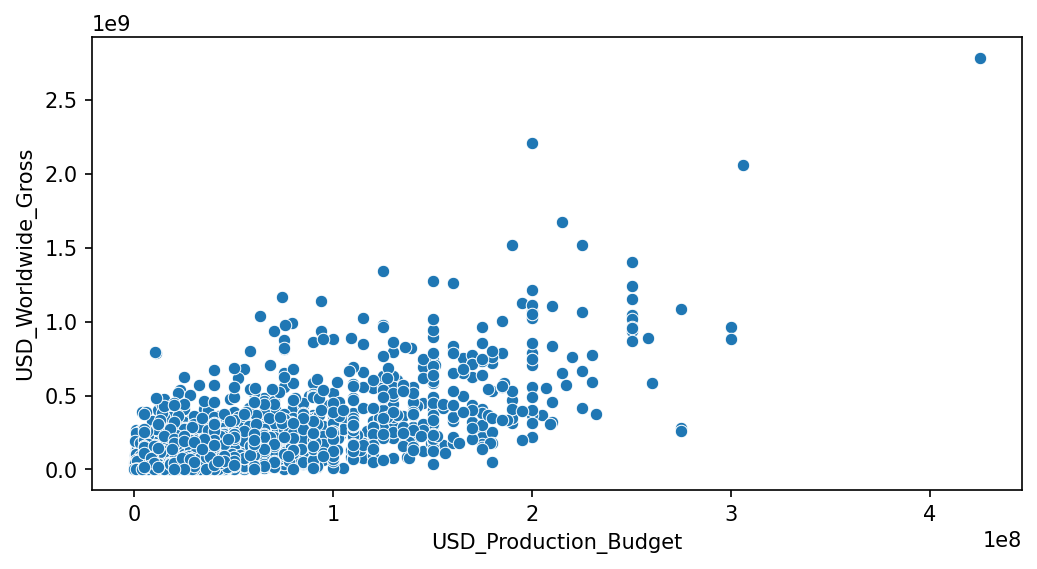

In [ ]:
plt.figure(figsize=(8,4), dpi=150)
sns.scatterplot(data = data_clean,
                x='USD_Production_Budget',
                y='USD_Worldwide_Gross'
                )
plt.show()

figuring axes 

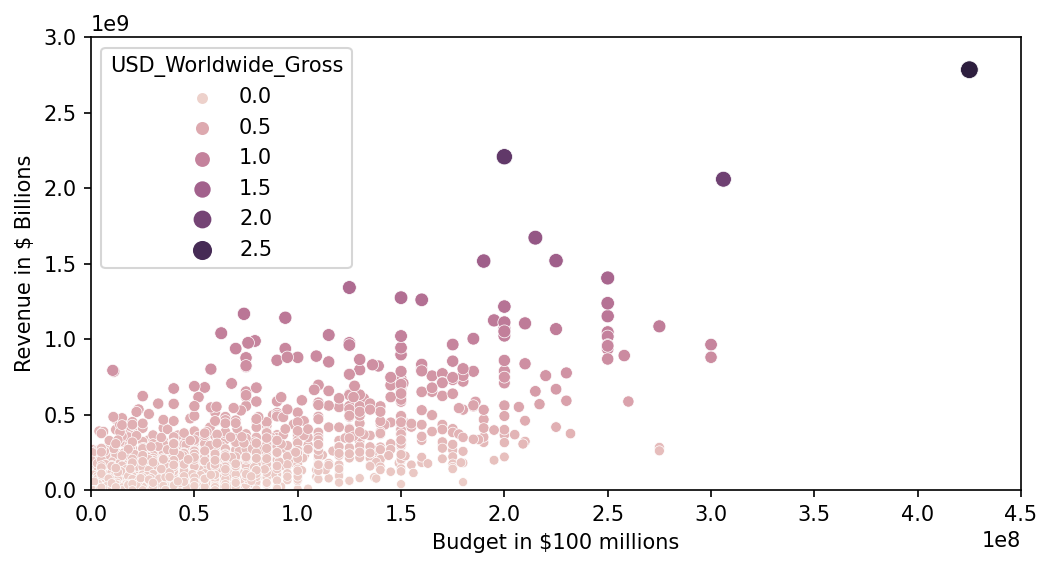

In [ ]:
plt.figure(figsize=(8,4), dpi=150)
axis = sns.scatterplot(data = data_clean,
                x='USD_Production_Budget',
                y='USD_Worldwide_Gross', 
                hue='USD_Worldwide_Gross',
                size='USD_Worldwide_Gross'
                )
axis.set(
    ylim=(0, 3000000000),
    xlim=(0, 450000000),
    ylabel='Revenue in $ Billions',
    xlabel='Budget in $100 millions',
)

plt.show()

To set the styling on a single chart (as opposed to all the charts in the entire notebook) we can use Python's with keyword. We've seen with used already when it comes to opening files in previous lessons.


[Seaborn Themes](https://www.python-graph-gallery.com/104-seaborn-themes)
In addition to 'darkgrid', Seaborn has a number of built-in themes. so you can style your chart very quickly. Try out 'whitegrid', 'dark',  or 'ticks' for example. 


Challenge

Now that you've seen how to create a beautiful bubble chart in Seaborn, it's time to create your own. Can you write the code to replicate this chart? Notice how we are actually representing THREE dimensions in this chart: the budget, the release date, and the worldwide revenue. This is what makes bubble charts so awesomely informative. 

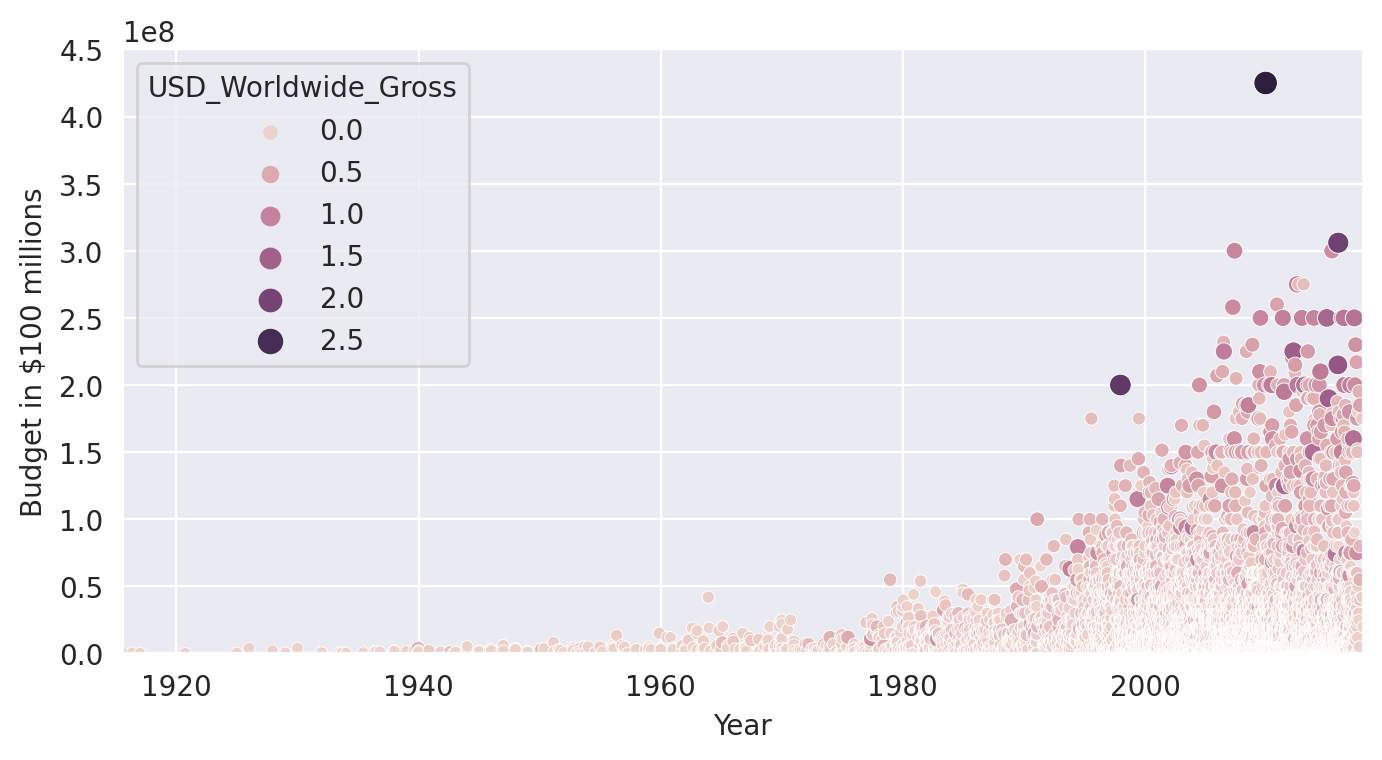

In [ ]:
plt.figure(figsize=(8,4), dpi=200)
 
with sns.axes_style("darkgrid"):
    ax = sns.scatterplot(data=data_clean, 
                    x='Release_Date', 
                    y='USD_Production_Budget',
                    hue='USD_Worldwide_Gross',
                    size='USD_Worldwide_Gross',)
 
    ax.set(ylim=(0, 450000000),
           xlim=(data_clean.Release_Date.min(), data_clean.Release_Date.max()),
           xlabel='Year',
           ylabel='Budget in $100 millions')

Analysis

What do we see here? What is this chart telling us? Well, first off, movie budgets have just exploded in the last 40 years or so. Up until the 1970s, the film industry appears to have been in an entirely different era. Budgets started growing fast from the 1980s onwards and continued to grow through the 2000s. Also, the industry has grown massively, producing many more films than before. The number of data points is so dense from 2000 onwards that they are overlapping. 

In [ ]:
date = dt.datetime.now()
print(date.year)

2021


Challenge

Can you create a column in data_clean that has the decade of the movie release. For example, a film released in 1992 or 1999 should have 1990 in the Decade column.

Here is one approach that you can follow:

    Create a DatetimeIndex object from the Release_Date column.

    Grab all the years from the DatetimeIndex object using the .year property.

    Use floor division // to convert the year data to the decades of the films.

    Add the decades as a Decade column to the data_clean DataFrame.

In [ ]:
print(data_clean.Release_Date[2].year)

1916


In [ ]:
# new_array = []
# for date in data_clean.Release_Date:
#   year = date.year 
#   if year > 2010 and year < 2019:
#     new_array.append(2010)
#   elif year > 2000 and year < 2009:
#     new_array.append(2000)
#   elif year > 1990 and year < 1999:
#     new_array.append(1990)
#   elif year > 1980 and year < 1990:
#     new_array.append(1980)
#   elif year > 1970 and year < 1980:
#     new_array.append(1970)
#   elif year > 1960 and year < 1970:
#     new_array.append(1960)
#   elif year > 1950 and year < 1960:
#     new_array.append(1950)
#   elif year > 1940 and year < 1950:
#     new_array.append(1940)
#   elif year > 1930 and year < 1940:
#     new_array.append(1930)
#   elif year > 1920 and year < 1930:
#     new_array.append(1920)
#   elif year > 1910 and year < 1920:
#     new_array.append(1910)
#   elif year > 1900 and year < 1910:
#     new_array.append(1900)
#   else: new_array.append(1900) 
 
# # data_clean.insert(-1, 'Datetimeindex', new_array)
# print(new_array)

[1910, 1910, 1910, 1900, 1920, 1920, 1920, 1920, 1900, 1930, 1930, 1930, 1930, 1930, 1930, 1930, 1930, 1930, 1930, 1930, 1930, 1930, 1930, 1930, 1900, 1900, 1900, 1940, 1940, 1940, 1940, 1940, 1940, 1940, 1940, 1940, 1940, 1940, 1940, 1940, 1940, 1940, 1940, 1940, 1940, 1940, 1900, 1900, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1900, 1900, 1900, 1900, 1900, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1970, 1970, 197

In [ ]:
dt_index = pd.DatetimeIndex(data_clean.Release_Date)
year = dt_index.year


In [ ]:
decade = year//10*10
data_clean['Decade'] = decade

In [ ]:
data_clean.head(10)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,1910
1,5140,1916-05-09,Intolerance,385907,0,0,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,1920
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,1920
5,4250,1925-12-30,Ben-Hur,3900000,9000000,9000000,1920
6,4630,1927-12-08,Wings,2000000,0,0,1920
7,5141,1929-01-02,The Broadway Melody,379000,4358000,2800000,1920
8,4240,1930-01-01,Hell's Angels,4000000,0,0,1930
9,5043,1931-12-31,Mata Hari,558000,900000,900000,1930


Challenge

Create two new DataFrames: old_films and new_films

    old_films should include all the films before 1970 (up to and including 1969)

    new_films should include all the films from 1970 onwards

    How many of our films were released prior to 1970?

    What was the most expensive film made prior to 1970?

In [ ]:
movie = []
for year in data_clean.Decade:
  if year > 1960: 
    movie.append("newmovie")
  else:
    movie.append('oldmovie')
print(movie)


['oldmovie', 'oldmovie', 'oldmovie', 'oldmovie', 'oldmovie', 'oldmovie', 'oldmovie', 'oldmovie', 'oldmovie', 'oldmovie', 'oldmovie', 'oldmovie', 'oldmovie', 'oldmovie', 'oldmovie', 'oldmovie', 'oldmovie', 'oldmovie', 'oldmovie', 'oldmovie', 'oldmovie', 'oldmovie', 'oldmovie', 'oldmovie', 'oldmovie', 'oldmovie', 'oldmovie', 'oldmovie', 'oldmovie', 'oldmovie', 'oldmovie', 'oldmovie', 'oldmovie', 'oldmovie', 'oldmovie', 'oldmovie', 'oldmovie', 'oldmovie', 'oldmovie', 'oldmovie', 'oldmovie', 'oldmovie', 'oldmovie', 'oldmovie', 'oldmovie', 'oldmovie', 'oldmovie', 'oldmovie', 'oldmovie', 'oldmovie', 'oldmovie', 'oldmovie', 'oldmovie', 'oldmovie', 'oldmovie', 'oldmovie', 'oldmovie', 'oldmovie', 'oldmovie', 'oldmovie', 'oldmovie', 'oldmovie', 'oldmovie', 'oldmovie', 'oldmovie', 'oldmovie', 'oldmovie', 'oldmovie', 'oldmovie', 'oldmovie', 'oldmovie', 'oldmovie', 'oldmovie', 'oldmovie', 'oldmovie', 'oldmovie', 'oldmovie', 'oldmovie', 'oldmovie', 'oldmovie', 'oldmovie', 'oldmovie', 'oldmovie', 'ol

In [ ]:
data_clean['Group'] = movie

In [ ]:
data_clean.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade,Group
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,1910,oldmovie
1,5140,1916-05-09,Intolerance,385907,0,0,1910,oldmovie
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,1910,oldmovie
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,1920,oldmovie
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,1920,oldmovie


In [ ]:
oldfilms = data_clean[data_clean.Group =='oldmovie']
newfilms = data_clean[data_clean.Group =='newmovie']


In [ ]:
oldfilms.shape

(153, 8)

In [ ]:
oldfilms.sort_values('USD_Production_Budget', ascending=False).head(10)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade,Group
109,1253,1963-12-06,Cleopatra,42000000,71000000,57000000,1960,oldmovie
150,2175,1969-12-16,"Hello, Dolly",24000000,33208099,33208099,1960,oldmovie
143,2465,1969-01-01,Sweet Charity,20000000,8000000,8000000,1960,oldmovie
118,2425,1965-02-15,The Greatest Story Ever Told,20000000,15473333,15473333,1960,oldmovie
148,2375,1969-10-15,Paint Your Wagon,20000000,31678778,31678778,1960,oldmovie
110,2552,1964-01-01,The Fall of the Roman Empire,19000000,4750000,4750000,1960,oldmovie
98,2546,1962-08-11,Mutiny on The Bounty,19000000,13680000,13680000,1960,oldmovie
114,2670,1964-10-22,My Fair Lady,17000000,72070955,72000000,1960,oldmovie
102,2698,1963-01-01,55 Days at Peking,17000000,10000000,10000000,1960,oldmovie
125,2831,1966-10-10,Hawaii,15000000,34562222,34562222,1960,oldmovie


Now that we have our Decades column we can use it to create subsets of our data.

    old_films = data_clean[data_clean.Decade <= 1960]
    new_films = data_clean[data_clean.Decade > 1960]

The cut-off for our calculation is 1960 in the Decade column because this will still include 1969. When we inspect our old_films DataFrame we see that it only includes 153 films. As we saw in the bubble chart, the bulk of films in the dataset have been released in the last 30 years. 

In [ ]:
    old_films = data_clean[data_clean.Decade <= 1960]
    new_films = data_clean[data_clean.Decade > 1960]

#Plotting Linear Regressions with Seaborn

Let's visualise the relationship between the movie budget and the worldwide revenue using linear regression. Seaborn makes this incredibly easy with the .regplot() function. 

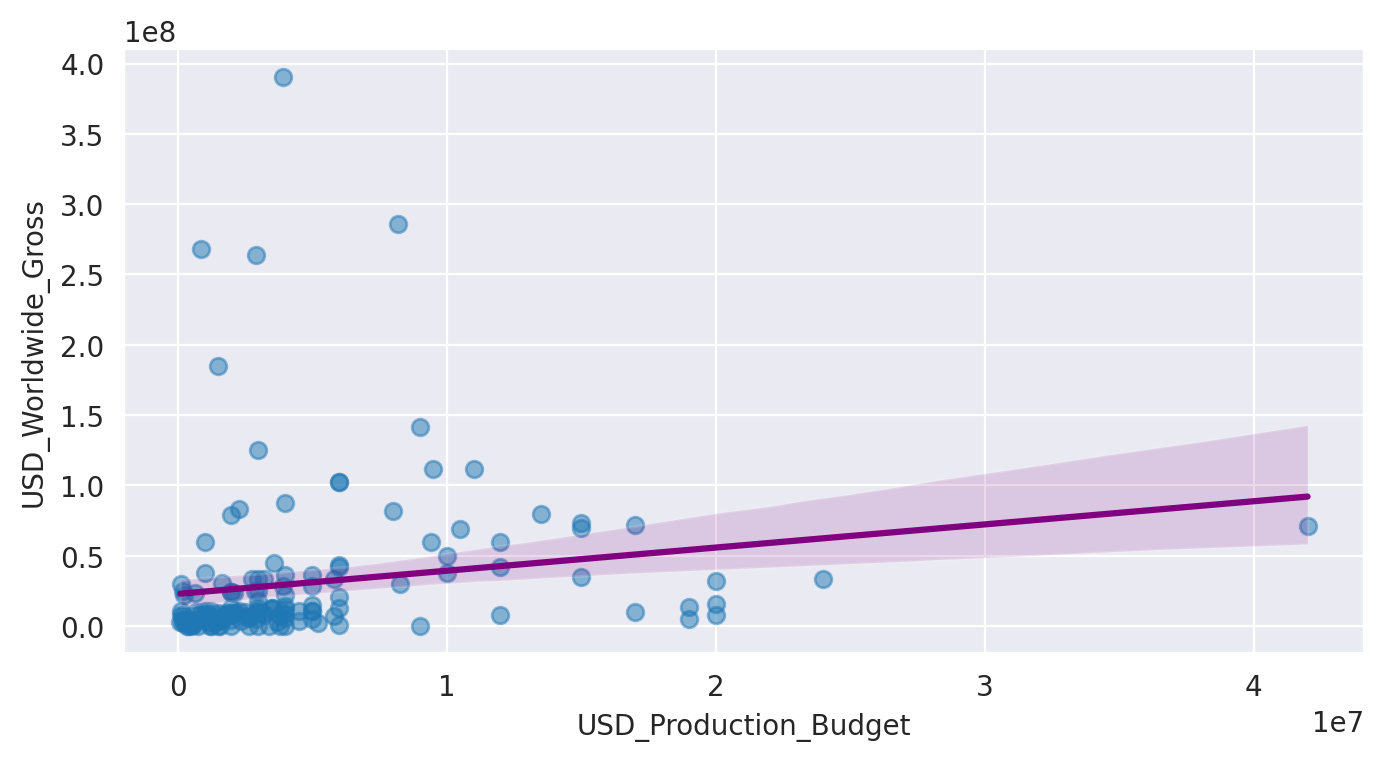

In [ ]:
plt.figure(figsize=(8,4), dpi=200)

with sns.axes_style('darkgrid'):
  sns.regplot(
      data=old_films,
      x='USD_Production_Budget',
      y='USD_Worldwide_Gross',
      scatter_kws = {'alpha': 0.5},
      line_kws= {'color': 'purple'}
  )

#Review

What do we see here? Well, first off we can spot Cleopatra on the far right. But also, we see that many lower budget films made much more money! The relationship between the production budget and movie revenue is not very strong. Many points on the left are very far away for the line, so the line appears not to capture the relationship between budget and revenue very well at all!

But does the same hold true for the newer films?

Challenge

Use Seaborn's .regplot() to show the scatter plot and linear regression line against the new_films.

Style the chart

    Put the chart on a 'darkgrid'.

    Set limits on the axes so that they don't show negative values.

    Label the axes on the plot "Revenue in $ billions" and "Budget in $ millions".

    Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

    Do our data points for the new films align better or worse with the linear regression than for our older films?

    Roughly how much would a film with a budget of $150 million make according to the regression line?

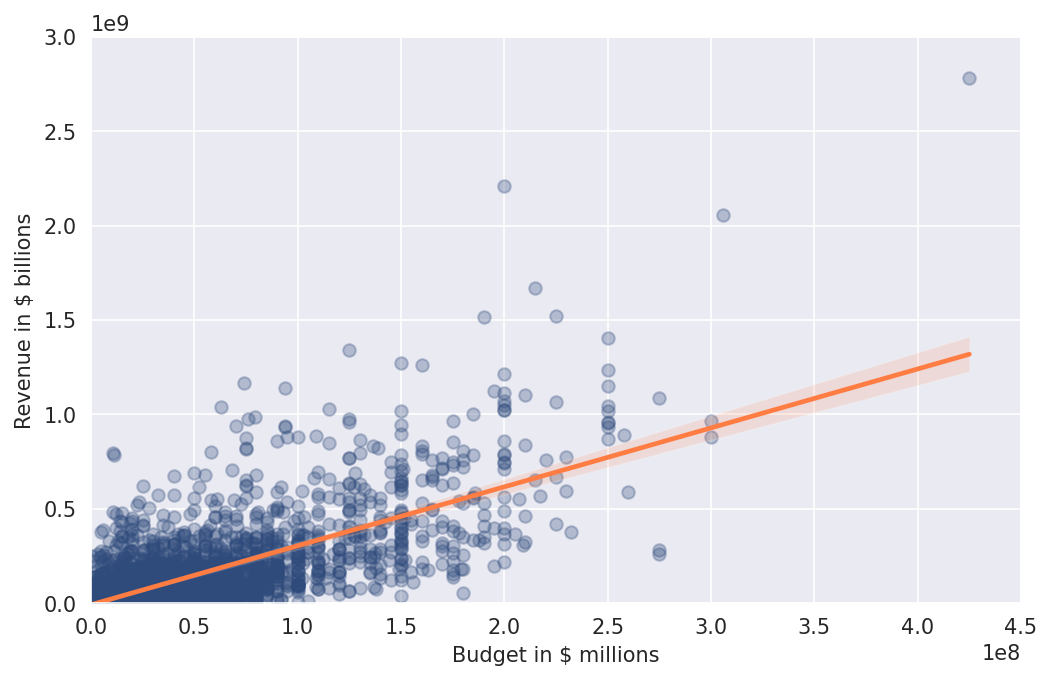

In [ ]:
plt.figure(figsize=(8,5), dpi=150)

with sns.axes_style('darkgrid'):
  ax = sns.regplot(
      data=new_films,
      x='USD_Production_Budget',
      y='USD_Worldwide_Gross',
      color='#2f4b7c',
      scatter_kws = {'alpha': 0.3},
      line_kws= {'color': '#ff7c43'}
  )
  ax.set(ylim=(0, 3000000000),
         xlim=(0, 450000000),
           xlabel='Budget in $ millions',
           ylabel='Revenue in $ billions')

How do we interpret our chart? This time we are getting a much better fit, compared to the old films. We can see this visually from the fact that our data points line up much better with our regression line (pun intended). Also, the confidence interval is much narrower. We also see that a film with a $150 million budget is predicted to make slightly under $500 million by our regression line. 

All in all, we can be pretty confident that there does indeed seem to be a relationship between a film's budget and that film's worldwide revenue.

But how much of the variation in revenue does the budget actually explain? And how much extra revenue can we expect for an additional $1 increase in the budget? To find out, we need to dive into the numbers underlying our regression model.

#Use scikit-learn to Run Your Own Regression

Let's dive into our linear regression model a bit more. We are using a univariate regression. This is a regression with a single explanatory variable (our movie BUDGET). Explanatory variables are also referred to as features in machine learning terminology.

Using our data on budgets, the linear regression estimates the best possible line to fit our movie revenues. The regression line has the following structure:


<img src='https://img-c.udemycdn.com/redactor/raw/2020-10-16_15-19-24-b9cd86771c12cda554da251a16471df9.png'>
```
# This is formatted as code
```
<img src='https://img-c.udemycdn.com/redactor/raw/2020-10-16_15-31-02-3bdbeb669ce3d7ecebe72abb986e8d35.png'>




To find the best possible line, our regression will estimate the y-intercept ("theta zero") and the slope ("theta one"). The line's intercept on the y-axis tells us how much revenue a movie would make if the budget was 0. The slope tells us how much extra revenue we get for a $1 increase in the movie budget. 

In [ ]:
regression = LinearRegression()

In [ ]:
new_films.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade,Group
153,2159,1970-01-01,Waterloo,25000000,0,0,1970,newmovie
154,2270,1970-01-01,Darling Lili,22000000,5000000,5000000,1970,newmovie
155,3136,1970-01-01,Patton,12000000,62500000,62500000,1970,newmovie
156,3277,1970-01-01,The Molly Maguires,11000000,2200000,2200000,1970,newmovie
157,4265,1970-01-01,M*A*S*H,3500000,81600000,81600000,1970,newmovie


Now we should specify our features and our targets (i.e., our response variable). You will often see the features named capital X and the target named lower case y:

In [ ]:
#Explanatory Variable(s) of Feature(s)
X = pd.DataFrame(new_films, columns=['USD_Production_Budget'])

In [ ]:
# response Variable or Target
y = pd.DataFrame(new_films, columns=['USD_Worldwide_Gross'])

Our LinearRegression does not like receiving Pandas Series (e.g., new_films.USD_Production_Budget), so I've created some new DataFrames here.



**Regression analysis** is used to find equations that fit data. Once we have the regression equation, we can use the model to make predictions. One type of regression analysis is linear analysis. When a correlation coefficient shows that data is likely to be able to predict future outcomes and a scatter plot of the data appears to form a straight line, you can use simple linear regression to find a predictive function. If you recall from elementary algebra, the equation for a line is y = mx + b. This article shows you how to take data, calculate linear regression, and find the equation **y’ = a + bx**. Note: If you’re taking AP statistics, you may see the equation written as **b0 + b1x**, which is the same thing (you’re just using the variables b0 + b1 instead of a + b. [ more here](https://www.statisticshowto.com/probability-and-statistics/regression-analysis/find-a-linear-regression-equation/)
<img src='https://www.statisticshowto.com/wp-content/uploads/2009/11/linearregressionequations.bmp'>
```
# This is formatted as code
```



In [ ]:
#Find the best-fit line
regression.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# theta zero a aka y-axis intercept 
regression.intercept_

array([-8653311.20858923])

In [ ]:
#theta one aka slope of line  
regression.coef_

array([[3.12262611]])

Both intercept_ and coef_ are simply attributes of the LinearRegression object. Don't worry about the underscores at the end, these are simply part of the attribute names that the scikit-learn developers have chosen.

How do we interpret the y-intercept? Literally, means that if a movie budget is $0, the estimated movie revenue is -$8.65 million. Hmm... so this is clearly unrealistic. Why would our model tell us such nonsense? Well, the reason is that we are specifying what the model should be ahead of time - namely a straight line - and then finding the best straight line for our data. Considering that you can't have negative revenue or a negative budget, we have to be careful about interpreting our very simple model too literally. After all, it's just an estimate and this estimate will be the most accurate on the chart where we have the most data points (rather than at the extreme left or right).

What about the slope? The slope tells us that for every extra $1 in the budget, movie revenue increases by $3.1. So, that's pretty interesting. That means the higher our budget, the higher our estimated revenue. If budgets are all that matter to make lots of money, then studio executives and film financiers should try and produce the biggest films possible, right? Maybe that's exactly why we've seen a massive increase in budgets over the past 30 years. 

In [ ]:
regression.score(X, y)

0.5576797626619335

#R-Squared: Goodness of Fit

One measure of figuring out how well our model fits our data is by looking at a metric called r-squared. This is a good number to look at in addition to eyeballing our charts.

    # R-squared
    regression.score(X, y)

We see that our r-squared comes in at around 0.558. This means that our model explains about 56% of the variance in movie revenue. That's actually pretty amazing, considering we've got the simplest possible model, with only one explanatory variable. The real world is super complex, so in many academic circles, if a researcher can build a simple model that explains over 50% or so of what is actually happening, then it's a pretty decent model.

Remember how we were quite sceptical about our regression looking at the chart for our old_films? 

#Challenge

Run a linear regression for the old_films. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

In [ ]:
old_films.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade,Group
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,1910,oldmovie
1,5140,1916-05-09,Intolerance,385907,0,0,1910,oldmovie
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,1910,oldmovie
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,1920,oldmovie
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,1920,oldmovie


In [ ]:
nX = pd.DataFrame(old_films, columns=['USD_Production_Budget'])
ny = pd.DataFrame(old_films, columns=['USD_Worldwide_Gross'])

In [ ]:
#regresion fit 
regression.fit(nX, ny)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print(f'The slope coeffecient: {regression.intercept_}')

The slope coeffecient [22821538.63508039]


In [ ]:
print(f'the intercept: {regression.coef_}')

the intercept: [[1.64771314]]


In [ ]:
print(f'The r-square is: {regression.score(nX,ny)}')

The r-square is: 0.02937258620576877


Running the numbers this time around, we can confirm just how inappropriate the linear model is for the pre-1970 films. We still see a positive relationship between budgets and revenue, since the slope (our theta-one) is 1.6, but the r-squared is very low. 


<img src='https://img-c.udemycdn.com/redactor/raw/2020-10-16_16-43-08-86be88ceaa656f3a0c07f04d3cf0dac7.png'>




**Challenge**

You've just estimated the intercept and slope for the Linear Regression model. Now we can use it to make a prediction! For example, how much global revenue does our model estimate for a film with a budget of $350 million?

In [ ]:
#From Equations Revevue = Q0 + Q1*Budget
# for the new movies
Rev = -8653311 + 3.12* 350e6
print(f'The global revenue for our model estimate for a film with a budget of $350 million: ${Rev}')

The global revenue for our model estimate for a film with a budget of $350 million: $1083346689.0


For a $350 million budget film, our model predicts a worldwide revenue of around $600 million! You can calculate this as follows:

    22821538 + 1.64771314 * 350000000

Or, using the regression object, you could also work it out like this:
The colon : and dot . in a print statement is quite handy for controlling the number of digits you'd like to show up in the output

In [ ]:
    budget = 350000000
    revenue_estimate = regression.intercept_[0] + regression.coef_[0,0]*budget
    revenue_estimate = round(revenue_estimate, -6)
    print(f'The estimated revenue for a $350 film is around ${revenue_estimate:.10}.')

The estimated revenue for a $350 film is around $600000000.0.
